In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',version=1)

In [3]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [5]:
data = mnist.data

In [6]:
data

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
mnist.target

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [12]:
test_num1 = data.values.reshape(-1,28,28)[:1,:,:].reshape(28,28)

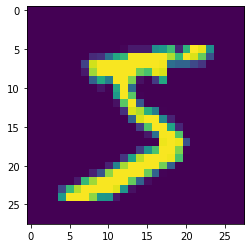

In [13]:
plt.imshow(test_num1)

In [14]:
mnist.target[0]

'5'

In [15]:
X,y=mnist.data,mnist.target
X_train,X_test,y_train,y_test = X[:60000],X[60000:],y[:60000],y[60000:]

In [16]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train)

SGDClassifier(random_state=42)

In [20]:
sgd_clf.predict(test_num1.reshape(-1,784))

array(['3'], dtype='<U1')

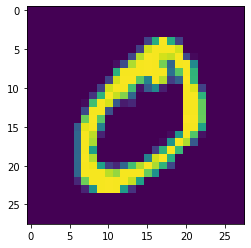

In [22]:
test_num2 = data.values.reshape(-1,28,28)[1:2,:,:].reshape(28,28)
plt.imshow(test_num2)

In [23]:
mnist.target[1]

'0'

In [24]:
sgd_clf.predict(test_num2.reshape(-1,784))

array(['0'], dtype='<U1')

In [25]:
from sklearn.metrics import accuracy_score
pred_train = sgd_clf.predict(X_train)
print("Training Accuracy",accuracy_score(y_train,pred_train))

from sklearn.metrics import accuracy_score
pred_test = sgd_clf.predict(X_test)
print("Testing Accuracy",accuracy_score(y_test,pred_test))

Training Accuracy 0.8807666666666667


In [29]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [31]:
tree_clf.predict(test_num1.reshape(-1,784))

array(['5'], dtype=object)

In [32]:
from sklearn.metrics import accuracy_score,
pred_train = tree_clf.predict(X_train)
print("Training Accuracy",accuracy_score(y_train,pred_train))

from sklearn.metrics import accuracy_score
pred_test = tree_clf.predict(X_test)
print("Testing Accuracy",accuracy_score(y_test,pred_test))

Training Accuracy 1.0
Testing Accuracy 0.8755


[Text(194.5690502814152, 215.30823529411765, 'X[350] <= 131.5\ngini = 0.9\nsamples = 60000\nvalue = [5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851\n5949]'),
 Text(114.32520260558057, 211.04470588235293, 'X[568] <= 0.5\ngini = 0.881\nsamples = 39160\nvalue = [5433, 623, 4772, 1312, 5353, 3266, 4775, 5773, 3081\n4772]'),
 Text(62.41662395826966, 206.78117647058824, 'X[430] <= 0.5\ngini = 0.839\nsamples = 24084\nvalue = [697, 414, 904, 847, 5133, 1668, 2771, 5568, 1439\n4643]'),
 Text(31.523556697882505, 202.5176470588235, 'X[405] <= 2.5\ngini = 0.705\nsamples = 9667\nvalue = [258, 404, 565, 424, 503, 503, 315, 4974, 836, 885]'),
 Text(18.49162253438747, 198.25411764705882, 'X[484] <= 0.5\ngini = 0.475\nsamples = 6717\nvalue = [247, 71, 401, 93, 336, 92, 166, 4803, 18, 490]'),
 Text(12.360700949807281, 193.99058823529413, 'X[153] <= 0.5\ngini = 0.262\nsamples = 5435\nvalue = [131, 71, 318, 87, 14, 64, 19, 4655, 13, 63]'),
 Text(9.909630941629167, 189.7270588235294, 'X[594] <= 2.0\n

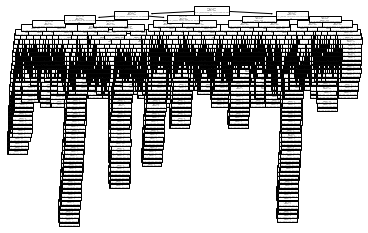

In [33]:
from sklearn.tree import plot_tree 
plot_tree(tree_clf)